In [ ]:
!pip install bertopic
!pip install swifter

In [ ]:
from bertopic import BERTopic
import spacy
import pandas as pd
import numpy as np
import swifter
import csv
import sys
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv("df_after_EDA.csv", index_col=0)
df

,title,text,organisation,date,category,year,month
0,Interoperability of messaging services – a gam...,Interoperability of messaging services is one ...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,InfoSociety,2022,3
1,EU market adjusting to lack of sunflower oil f...,"Brussels, March – A month after the invasion...",FEDIOL - The EU Vegetable Oil and Proteinmeal ...,2022-03-24 23:00:00+00:00,Agriculture & Food,2022,3
2,S&Ds welcome the use of cohesion funds in EU r...,The Socialists and Democrats in the European P...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,Euro & Finance,2022,3
3,Roaming calls within the EU remain cheap and i...,The European Parliament has adopted the new ru...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,InfoSociety,2022,3
4,S&Ds welcome the Strategic Compass as a big st...,"One month ago, Vladimir Putin gave Russian tro...",S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,Security,2022,3
...,...,...,...,...,...,...,...
11957,CEEP wants the mission for flexicurity to have...,After the announcement of the setting up of a ...,CEEP - European Centre of Employers and Enterp...,2008-02-14 15:47:51+00:00,Social Europe & Jobs,2008,2
11958,The world is learning about lab tests…,The Lab Tests Online community celebrated last...,EDMA - European Diagnostic Manufacturers Assoc...,2008-02-14 15:46:41+00:00,Health & Consumers,2008,2
11959,Results of EUFORES’ Inter-Parliamentary Meetin...,"On January , the Inter-Parliamentary Meeting ...",EUFORES - European Forum for Renewable Energy ...,2008-02-14 15:38:47+00:00,NaN,2008,2
11960,CPME: Health services: Patients and Medical do...,EPF and CPME: a Health services Directive is n...,CPME - The Standing Committee of European Doctors,2008-02-12 14:02:37+00:00,Health & Consumers,2008,2


In [ ]:
print("Kwantyle liczby wystąpień organizacji:")
perc = [.5, .6, .7, .8, .9, .95, 0.96, 0.97, 0.98, 0.99]
df_q = pd.DataFrame(df.organisation.value_counts().describe(percentiles = perc)).iloc[4:-1]
df_q['count'] =  perc
df_q['count'] = df_q['count'].apply(lambda x: (1-x)*len(df.organisation.value_counts()))
df_q
df_q.columns = ['Liczba notek od danej organizacji', 'Liczba organizacji, które posiadają więcej notek niż wartość po lewo']
df_q

Kwantyle liczby wystąpień organizacji:


,Liczba notek od danej organizacji,"Liczba organizacji, które posiadają więcej notek niż wartość po lewo"
50%,1.00,401.50
60%,2.00,321.20
70%,4.00,240.90
80%,8.00,160.60
90%,24.00,80.30
95%,48.70,40.15
96%,59.76,32.12
97%,77.88,24.09
98%,100.92,16.06
99%,186.80,8.03


In [ ]:
print("Kwantyle liczby wystąpień kategorii:")
perc = [.5, .6, .7, .8, .9, .95, 0.96, 0.97, 0.98, 0.99]
df_q1 = pd.DataFrame(df.category.value_counts().describe(percentiles = perc)).iloc[4:-1]
df_q1['count'] =  perc
df_q1['count'] = df_q1['count'].apply(lambda x: (1-x)*len(df.category.value_counts()))
df_q1.columns = ['Liczba notek z daną kategorią', 'Liczba kategorii, są bardziej popularne niż wartość po lewo']
df_q1

Kwantyle liczby wystąpień kategorii:


,Liczba notek z daną kategorią,"Liczba kategorii, są bardziej popularne niż wartość po lewo"
50%,1.0,460.50
60%,2.0,368.40
70%,3.0,276.30
80%,4.0,184.20
90%,11.0,92.10
95%,28.0,46.05
96%,33.6,36.84
97%,44.0,27.63
98%,69.0,18.42
99%,263.0,9.21


In [ ]:
sum(df.text.apply(lambda x: len(str(x).split(" "))) > 512)

3085

# Modelowanie tematów

In [ ]:
count_vectorizer = CountVectorizer(stop_words="english", min_df=10)

In [71]:
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", vectorizer_model=count_vectorizer)

In [72]:
dfs = df#.sample(frac = .1) #raczej tylko do sprawdzania czy coś działa
dfs = dfs.reset_index(drop=True)

In [ ]:
topics, probs = topic_model.fit_transform(dfs['text'])

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,2869,-1_european_eu_europe_health
1,0,194,0_plastics_packaging_waste_recycling
2,1,142,1_etno_broadband_networks_ecoms
3,2,138,2_ukraine_russia_ukrainian_russian
4,3,130,3_eurozone_greece_fiscal_debt
...,...,...,...
197,201,11,201_drinks_soft_sugar_reduction
206,205,10,205_ge_grid_power_energy
207,206,10,206_enel_mw_power_edf
208,207,10,207_leave_carers_balance_parents


In [ ]:
topic_model.get_topic(0)

[('plastics', 0.0403669579088629),
 ('packaging', 0.03596811404698694),
 ('waste', 0.034883304657603705),
 ('recycling', 0.03258718346442901),
 ('plastic', 0.02381792201937749),
 ('steel', 0.02114755637220322),
 ('circular', 0.019596854520775076),
 ('recycled', 0.01755187962650716),
 ('materials', 0.01602336402906405),
 ('material', 0.01083553098167106)]

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_heatmap()

In [63]:
topic_model.visualize_topics()

Wyraźnie widoczne klastry. Aczkolwiek jest ich sporo.

In [ ]:
topics_per_organisations = topic_model.topics_per_class(dfs['text'], topics, dfs.organisation)

In [ ]:
topic_model.visualize_topics_per_class(topics_per_organisations)

# Konwersja daty

In [59]:
df.date = pd.to_datetime(df.date)
df['y-m-d'] = df.date.apply(lambda x: x.strftime("%Y-%m-%d"))
df['y-m'] = df.date.apply(lambda x: x.strftime("%Y-%m"))
df['y'] = df.date.apply(lambda x: x.strftime("%Y"))
df['m'] = df.date.apply(lambda x: x.strftime("%m-%Y"))
df['w'] = df.date.apply(lambda x: x.strftime("%A")) # dzień tygodnia

In [ ]:
dfs = df#.sample(frac = .1) #raczej tylko do sprawdzania czy coś działa
dfs = dfs.reset_index(drop=True)

# Ze względu na time
TODO: utworzyć kolumnę rok-miesiąc-dzień do kategoryzacji (podział na sekundy i milisekundy nie ma sensu)
- yyyy/mm/dd
- yyyy/mm
- yyyy

In [ ]:
count_vectorizer2 = CountVectorizer(stop_words="english", min_df=5)
topic_model_categories = BERTopic(embedding_model="all-MiniLM-L6-v2", vectorizer_model=count_vectorizer2)

In [ ]:
topics_categories, probs = topic_model_categories.fit_transform(dfs['text'])

In [38]:
topic_model_categories.topics_over_time(dfs['text'], topics, dfs['y-m-d'])

,Topic,Words,Frequency,Timestamp
0,-1,"mobility, social, ceep, employability, czech",1,2008-01-22
1,97,"epf, cpme, awaited, reiterate, doctors",1,2008-02-12
2,-1,"arrival, versions, celebrated, laboratory, cen...",1,2008-02-14
3,8,"epsco, flexicurity, mission, vladimir, chances",1,2008-02-14
4,11,"parliamentarians, parliaments, organized, inte...",1,2008-02-14
...,...,...,...,...
9255,-1,"troops, compass, defence, putin, peace",1,2022-03-24
9256,7,"cohesion, wind, war, refugees, regions",1,2022-03-24
9257,64,"children, messaging, interoperability, child, big",1,2022-03-24
9258,182,"roaming, uitp, dubai, punished, charges",1,2022-03-24


In [36]:
topics_in_time = topic_model_categories.topics_over_time(dfs['text'], topics, dfs['y-m-d'])

In [37]:
topic_model_categories.visualize_topics_over_time(topics_in_time)

In [39]:
topics_in_time_by_month = topic_model_categories.topics_over_time(dfs['text'], topics, dfs['y-m'])
topic_model_categories.visualize_topics_over_time(topics_in_time_by_mont)

In [ ]:
topics_per_year = topic_model_categories.topics_over_time(dfs['text'], topics, dfs['year'])

In [ ]:
topic_model_categories.visualize_topics_over_time(topics_per_year)


# Stworzenie mapowania kategorii

Modelowanie tematów dla kategorii za pomocą BERTopic, a następnie zastąpienie powiązanych kategorii najpopularniejszą


In [ ]:
topic_model2 = BERTopic(embedding_model="all-MiniLM-L6-v2", n_gram_range = (2, 2))

In [ ]:
unique_categories = pd.unique(df.category)
unique_categories = list(map(str, unique_categories))
unique_categories_df = pd.DataFrame(df.category.value_counts()).reset_index()
unique_categories_df.columns = ['category', 'count_categories']

In [ ]:
top_categories, probs = topic_model2.fit_transform(unique_categories_df.category)

In [ ]:
info = topic_model2.get_topic_info()

In [ ]:
unique_categories_df['Topic'] = top_categories

In [ ]:
categories_df = pd.merge(info, unique_categories_df, on = 'Topic')
categories_df = categories_df.drop("Count", axis = 1)
most_popular_category = categories_df.groupby("Name").first().reset_index().loc[:, ["Name", "category"]]

In [ ]:
result_categories = pd.merge(categories_df, most_popular_category, on="Name").loc[:,["category_x", "category_y"]]
print("Wynikowa liczba kategorii:", len(pd.unique(result_categories.category_y)))
result_categories #wynikowe mapowanie kategorii

Wynikowa liczba kategorii: 23


,category_x,category_y
0,Health & Consumers,Health & Consumers
1,Agriculture & Food,Health & Consumers
2,Agriculture & FoodHealth & Consumers,Health & Consumers
3,Health & ConsumersInfoSociety,Health & Consumers
4,Health & ConsumersAgriculture & Food,Health & Consumers
...,...,...
916,Public AffairsInnovation & Enterprise,Public Affairs
917,Public AffairsInfoSocietyEducationEU Prioritie...,Public Affairs
918,Public AffairsInfoSociety,Public Affairs
919,Public AffairsInfoSocietyEnlargementEU Priorit...,Public Affairs


In [64]:
topic_model2.visualize_topics()

6 głównych klastrów.

TODO: Przeanalizować.

# Analiza tematów
Jaki wpływ na wyodrębnienie tematów ma:
- lematyzacja,
- lowercase
- usunięcie stopwords?

### Stopwords

In [75]:
from gensim.parsing.preprocessing import remove_stopwords

df['cleaned_text'] = df.text.apply(lambda x: remove_stopwords(x))


,title,text,organisation,date,category,year,month,y-m-d,y-m,y,m,w,cleaned_text
0,Interoperability of messaging services – a gam...,Interoperability of messaging services is one ...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,InfoSociety,2022,3,2022-03-24,2022-03,2022,03-2022,Thursday,Interoperability messaging services big wins S...
1,EU market adjusting to lack of sunflower oil f...,"Brussels, March – A month after the invasion...",FEDIOL - The EU Vegetable Oil and Proteinmeal ...,2022-03-24 23:00:00+00:00,Agriculture & Food,2022,3,2022-03-24,2022-03,2022,03-2022,Thursday,"Brussels, March – A month invasion Ukraine Rus..."
2,S&Ds welcome the use of cohesion funds in EU r...,The Socialists and Democrats in the European P...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,Euro & Finance,2022,3,2022-03-24,2022-03,2022,03-2022,Thursday,The Socialists Democrats European Parliament w...
3,Roaming calls within the EU remain cheap and i...,The European Parliament has adopted the new ru...,S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,InfoSociety,2022,3,2022-03-24,2022-03,2022,03-2022,Thursday,The European Parliament adopted new rules exte...
4,S&Ds welcome the Strategic Compass as a big st...,"One month ago, Vladimir Putin gave Russian tro...",S&amp;D - Socialists &amp; Democrats in the Eu...,2022-03-24 23:00:00+00:00,Security,2022,3,2022-03-24,2022-03,2022,03-2022,Thursday,"One month ago, Vladimir Putin gave Russian tro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11957,CEEP wants the mission for flexicurity to have...,After the announcement of the setting up of a ...,CEEP - European Centre of Employers and Enterp...,2008-02-14 15:47:51+00:00,Social Europe & Jobs,2008,2,2008-02-14,2008-02,2008,02-2008,Thursday,After announcement setting “mission flexicurit...
11958,The world is learning about lab tests…,The Lab Tests Online community celebrated last...,EDMA - European Diagnostic Manufacturers Assoc...,2008-02-14 15:46:41+00:00,Health & Consumers,2008,2,2008-02-14,2008-02,2008,02-2008,Thursday,The Lab Tests Online community celebrated week...
11959,Results of EUFORES’ Inter-Parliamentary Meetin...,"On January , the Inter-Parliamentary Meeting ...",EUFORES - European Forum for Renewable Energy ...,2008-02-14 15:38:47+00:00,NaN,2008,2,2008-02-14,2008-02,2008,02-2008,Thursday,"On January , Inter-Parliamentary Meeting Renew..."
11960,CPME: Health services: Patients and Medical do...,EPF and CPME: a Health services Directive is n...,CPME - The Standing Committee of European Doctors,2008-02-12 14:02:37+00:00,Health & Consumers,2008,2,2008-02-12,2008-02,2008,02-2008,Tuesday,EPF CPME: Health services Directive needed. Th...


In [77]:
dfs = df#.sample(frac = .1) #raczej tylko do sprawdzania czy coś działa
dfs = dfs.reset_index(drop=True)

In [ ]:
topic_model3 = BERTopic(embedding_model="all-MiniLM-L6-v2", vectorizer_model=count_vectorizer)
topics, probs = topic_model3.fit_transform(dfs['cleaned_text'])

In [ ]:
topic_model3.get_topic_info()

In [ ]:
topic_model3.visualize_topics()

# Lemmatization

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])
df['docs'] = df.text.apply(lambda x: nlp(x))

In [ ]:
df['cleaned_text2'] = df.docs.apply(lambda x: " ".join([token.lemma_ for token in x]))
df

In [ ]:
dfs = df#.sample(frac = .1) #raczej tylko do sprawdzania czy coś działa
dfs = dfs.reset_index(drop=True)

In [ ]:
topic_model4 = BERTopic(embedding_model="all-MiniLM-L6-v2", vectorizer_model=count_vectorizer)
topics, probs = topic_model4.fit_transform(dfs['cleaned_text2'])

In [ ]:
topic_model4.get_topic_info()

In [ ]:
topic_model4.visualize_topics()

# Reduction

TODO: Nie jestem pewna do jakiej liczby zredukować. Dla topic_model - 15? (tyle ile klastrów na wykresie)

In [ ]:
new_topics, new_probs = topic_model.reduce_topics(dfs['text'], topics, probs, nr_topics=10)

In [ ]:
topic_model.get_topic_info()

In [ ]:
topic_model.visualize_topics()

# Podobieństwo organizacji, agendy

In [7]:
from numpy.linalg import norm
from numpy import dot
import seaborn as sns

In [2]:
#dfs_topics = pd.read_csv('/Users/danieltytkowski/Downloads/dfs_topics.csv')

Wybór 30 najcześciej publikujących i utworzenie crosstable, która przyda się do tfidf

In [3]:
top30 = list(dfs_topics['organisation'].value_counts().head(30).index)
tfidf_df = dfs_topics.loc[dfs_topics['organisation'].isin(top30), ['organisation','topic']]
tab = pd.crosstab(tfidf_df['organisation'], tfidf_df['topic'])
tab = tab.loc[~tab.index.isin(['Medicines for Europe'])]

In [9]:
len(tab)

29

Utworzenie tabeli z wartościami tfidf (tematy traktujemy jako słowa, organizacje jako duze dokumenty)

In [4]:
tfidf_df_w = pd.DataFrame(columns=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], index=tab.index)
for i in range(-1,15):
  for col in tab.index:
    tfidf_df_w[i][col] = ((tab[i][col])/(tfidf_df['topic'].value_counts()[i]))*(np.log(29/(tab[i]>0).sum()))

Mamy juz 15 unikalnych tematów, mozemy więc liczyć cosine similarity między wektorami tfidf kazdej organizacji i na podstawie tego sprawdzać które mają podobną agendę(chyba)

In [5]:
cos_sim = pd.DataFrame(columns=list(tab.index), index=tab.index)
for col1 in cos_sim.columns:
  for col2 in cos_sim.columns:
    cos_sim[col1][col2] = dot(list(tfidf_df_w.loc[col1]), list(tfidf_df_w.loc[col2]))/(norm(list(tfidf_df_w.loc[col1]))*norm(list(tfidf_df_w.loc[col2])))

<AxesSubplot:>

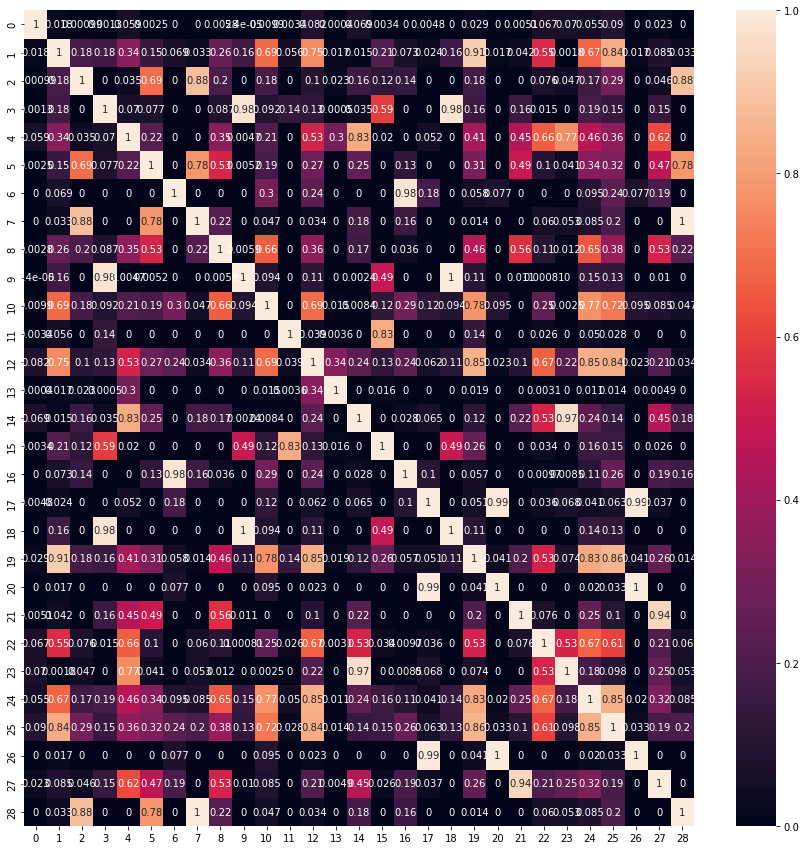

In [8]:
plt.figure(figsize = (15,15))
sns.heatmap(np.array(cos_sim).tolist(), annot=True)